In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision
from torchvision import transforms

In [5]:
trainset = torchvision.datasets.MNIST(root='data/', 
                                      train=True, 
                                      transform = torchvision.transforms.Compose([
                                          transforms.Resize(10),
                                          transforms.ToTensor()]),
                                      download=True)

testset = torchvision.datasets.MNIST(root='data/', 
                                     train=False,
                                     transform = torchvision.transforms.Compose([
                                         transforms.Resize(10), 
                                         transforms.ToTensor()]), 
                                     download=True)

torch.Size([1, 10, 10])
torch.Size([10, 10])
tensor(4)


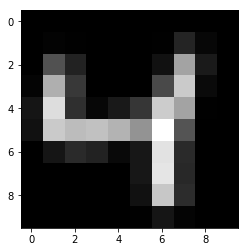

In [7]:
import matplotlib.pyplot as plt
img = trainset[2][0]
print(img.shape)
img = img.reshape(10, 10)
print(img.shape)
print(trainset[2][1])
plt.gray()
plt.imshow(img)

In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(100, 25)
        self.fc2 = nn.Linear(25, 10)
        
    def forward(self, x):
        z1 = F.relu(self.fc1(x.view(4, -1)))
        out = self.fc2(z1)
        return out, z1

In [11]:
net = Net()

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
num_epochs = 2
for epoch in range(num_epochs):
    print('Epoch: {}/{}'.format(epoch+1, num_epochs))
    print('='*10)
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs[0], labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    print('train loss: {}\n'.format(running_loss/len(trainloader)))

print('Finished Training')

Epoch: 1/2
train loss: 2.9876538917541504

Epoch: 2/2
train loss: 1.4123513883352279

Finished Training


In [19]:
net.fc2.weight.data.shape

torch.Size([10, 25])

In [147]:
for i, data in enumerate(trainloader):
    images, labels = data
    print(labels)
    out, fc_in, z2, out1, z1 = net(images)
    if i == 1:
        break

tensor([4, 5, 3, 3])
tensor([2, 0, 9, 0])


In [153]:
z2.shape

torch.Size([4, 6, 11, 11])

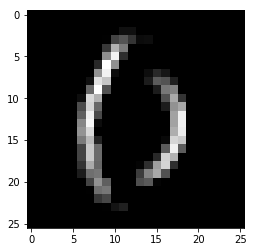

In [162]:

plt.imshow(z1[1][0].detach().numpy())

In [163]:
running_correct = 0
for data in testloader:
    images, labels = data
    outputs = net(images)
    _, preds = torch.max(outputs[0], 1)
    running_correct += (preds == labels).sum().item()

print('test acc: {}'.format(running_correct/len(testset)))

test acc: 0.9819


In [164]:
torch.save(net, 'net.pth')

C:\Users\ADMIN\Anaconda3\envs\machlearn\lib\site-packages\torch\serialization.py:241: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [165]:
model = torch.load('net.pth')

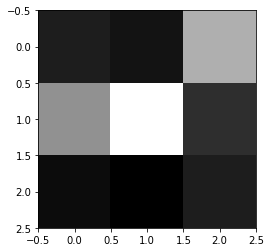

In [166]:
plt.imshow(model.conv1.weight.data[2].reshape(3, 3))